In [2]:
import MDAnalysis as mda
from MDAnalysis.analysis import distances
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

/ibpc/lumo/sritharan/.conda/envs/mdanalysis/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# Get a list of all .pdb files in the directory
models_dir = os.chdir("/ibpc/lumo/sritharan/These/Papier/Papier_1/Data/Models/Monomere/")
models = [f for f in os.listdir(models_dir) if f.endswith('.pdb')]
models

['RF.pdb', 'AFM.pdb', 'AF.pdb', 'TR.pdb', 'ESM.pdb', 'OF.pdb']

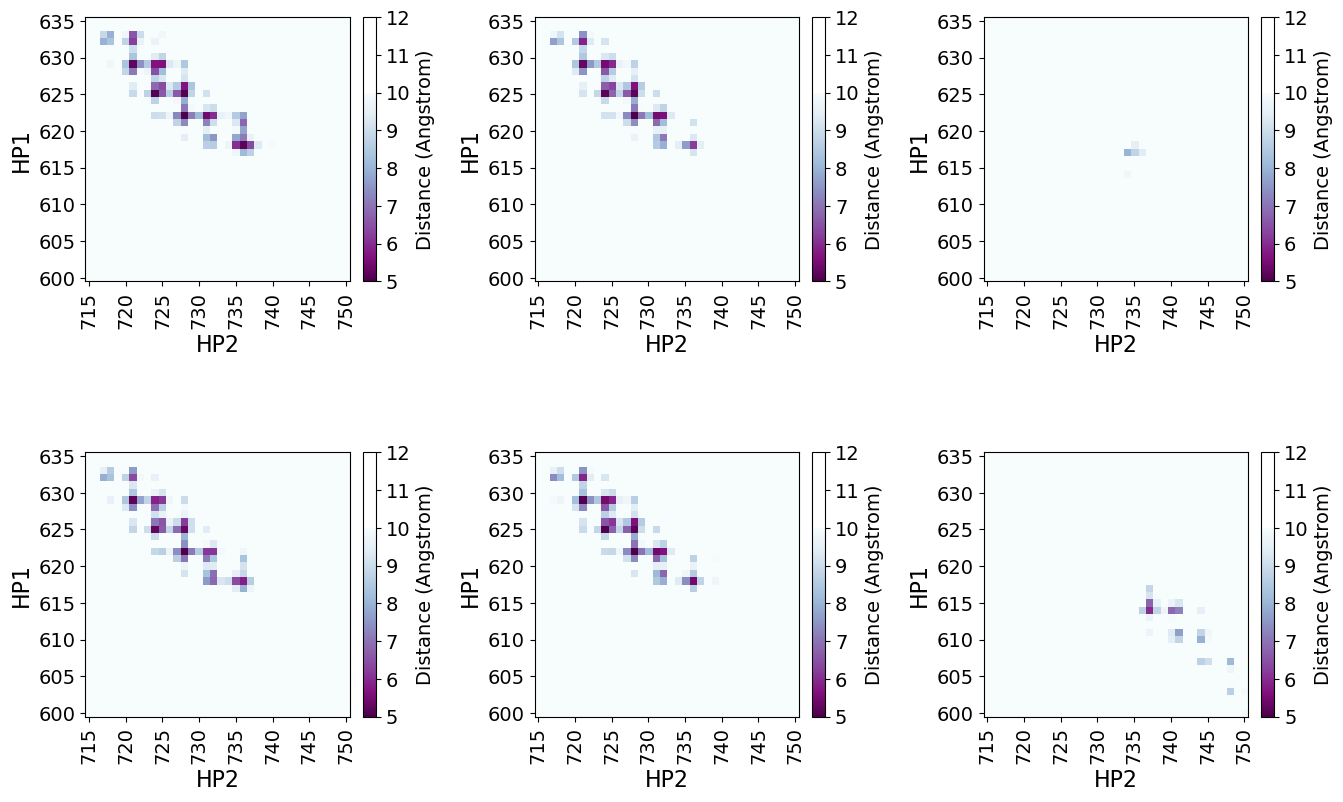

In [11]:
nrows = 2
ncols = 3
fig, axs = plt.subplots(nrows, ncols, figsize=(15, 10))

for ax, model in zip(axs.flat, models):
    u = mda.Universe(model)
    HP1_bb = u.select_atoms('name CA and resid 600-635')
    HP2_bb = u.select_atoms('name CA and resid 715-750')
    
    n_HP1 = len(HP1_bb)
    n_HP2 = len(HP2_bb)
    
    dist_arr = distances.distance_array(HP1_bb.positions, HP2_bb.positions, box=u.dimensions)

    cmap = 'BuPu_r'
    vmin = 5
    vmax = 10

    im = ax.imshow(dist_arr, cmap=cmap, vmin=vmin, vmax=vmax, origin='lower')
    
    tick_interval = 5
    ax.set_yticks(np.arange(n_HP1)[::tick_interval])
    ax.set_xticks(np.arange(n_HP2)[::tick_interval])
    ax.set_yticklabels(HP1_bb.resids[::tick_interval], fontsize=14)
    ax.set_xticklabels(HP2_bb.resids[::tick_interval], fontsize=14, rotation=90)
    ax.set_ylabel('HP1', fontsize=16)
    ax.set_xlabel('HP2', fontsize=16)

    axins = inset_axes(ax,
                    width="5%",  # width = 5% of parent_bbox width
                    height="100%",  # height : 100%
                    loc='lower left',
                    bbox_to_anchor=(1.05, 0., 1, 1),
                    bbox_transform=ax.transAxes,
                    borderpad=0,
                    )
    cbar = fig.colorbar(im, cax=axins)
    cbar.set_ticks(np.arange(5, 13, 1))
    cbar.set_label('Distance (Angstrom)', fontsize=14)
    cbar.ax.tick_params(labelsize=14)


plt.subplots_adjust(wspace=0.7, hspace=0.3)
plt.savefig("all_models.png", format='png', dpi=300, transparent=True)


# Carte de distance pour dimer

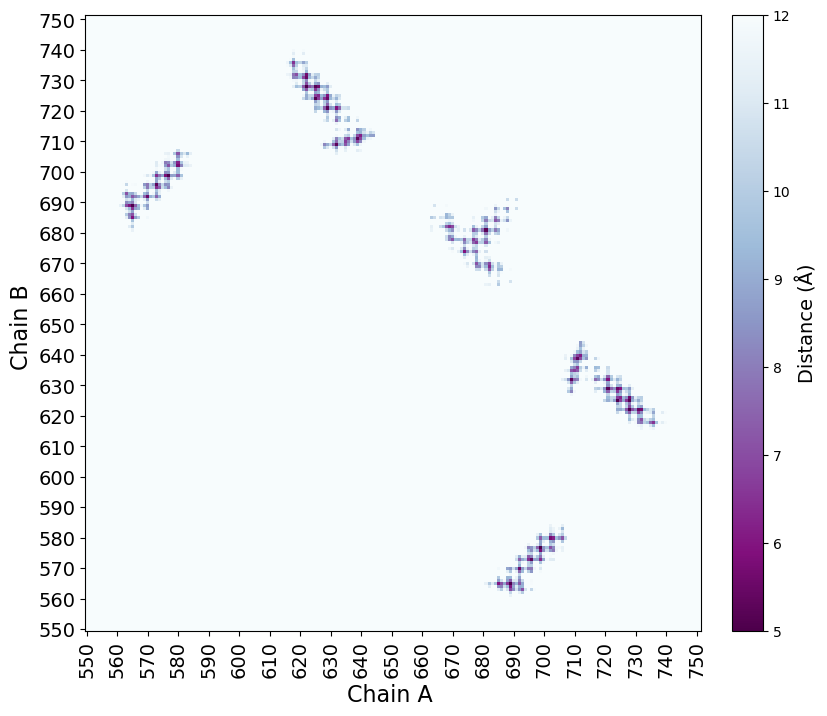

In [20]:

# Load the trajectory and topology files
u = mda.Universe("../Dimere/Dimere_AFM.pdb")

#chain_A = u.select_atoms("protein and segid A and name CA and (resid 600:635 or resid 716:751)")
#chain_B = u.select_atoms("protein and segid B and name CA and (resid 600:635 or resid 716:751)")
chain_A = u.select_atoms("protein and segid A and name CA and (resid 550:751)")
chain_B = u.select_atoms("protein and segid B and name CA and (resid 550:751)")

n_chainA = len(chain_A)
n_chainB = len(chain_B)

dist_arr = distances.distance_array(chain_A.positions, chain_B.positions, box=None)

fig, ax = plt.subplots(figsize=(8, 8))
    
cmap = 'BuPu_r'
vmin = 5
vmax = 12

im = ax.imshow(dist_arr, cmap=cmap, origin='lower', vmin=vmin, vmax=vmax)

tick_interval = 10
ax.set_yticks(np.arange(n_chainA)[::tick_interval])
ax.set_xticks(np.arange(n_chainB)[::tick_interval])
ax.set_yticklabels(chain_A.resids[::tick_interval],fontsize=14)
ax.set_xticklabels(chain_B.resids[::tick_interval],fontsize=14,rotation=90)

plt.xlabel('Chain A ',fontsize=16)
plt.ylabel('Chain B ',fontsize=16)

# create an inset axes for the colorbar
axins = inset_axes(ax,
                   width="5%",  # width = 5% of parent_bbox width
                   height="100%",  # height : 100%
                   loc='lower left',
                   bbox_to_anchor=(1.05, 0., 1, 1),
                   bbox_transform=ax.transAxes,
                   borderpad=0,
                   )

cbar = plt.colorbar(im, cax=axins)  # use the colorbar with the image returned from imshow
cbar.set_label('Distance (Å)',fontsize=14)

plt.savefig("dimere.png", format='png', dpi=300, transparent=True,bbox_inches='tight')
plt.show()
